<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Web_Scraping_Video_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scrape a video games webpage, extract some data and create a data frame. 

In [ ]:
# Install the packages
!pip install beautifulsoup4 requests pandas

In [1]:
# Import the required libraries.
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv


*   requests allows you to send HTTP requests to a server which returns a Response Object with all the response data (i.e. HTML).

*   beautifulsoup (bs4) is used to pull data out of HTML files and convert the data to a BeautifulSoup object, which represents the HTML as a nested data structure.
*   pandas is used for data analysis and manipulation.



**Review the Web Page's HTML Structure**

We need to understand the structure and contents of the HTML tags within the web pages. For this project, we will be using the Metacritic Super Mario 3d World Reviews webpage (shown below). You can find this webpage by selecting this link https://www.metacritic.com/game/switch/super-mario-3d-world-+-bowsers-fury/user-reviews 

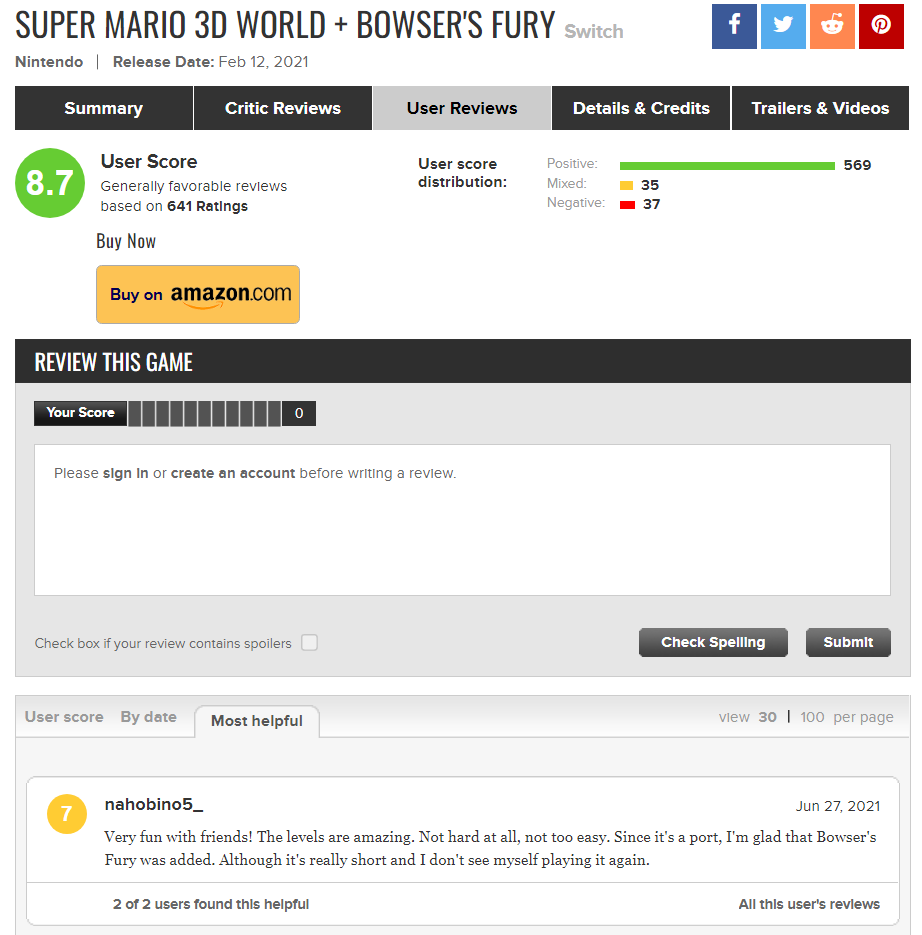

We can scrape this webpage by parsing the HTML of the page and extracting the information needed for our dataset. To scrape some data from this web page right click anywhere on the web page, click the arrow icon on the upper left-hand side of the screen with the HTML and then click the name (nahobino5_) in the review section of the webpage. This will result in the following screen being displayed.

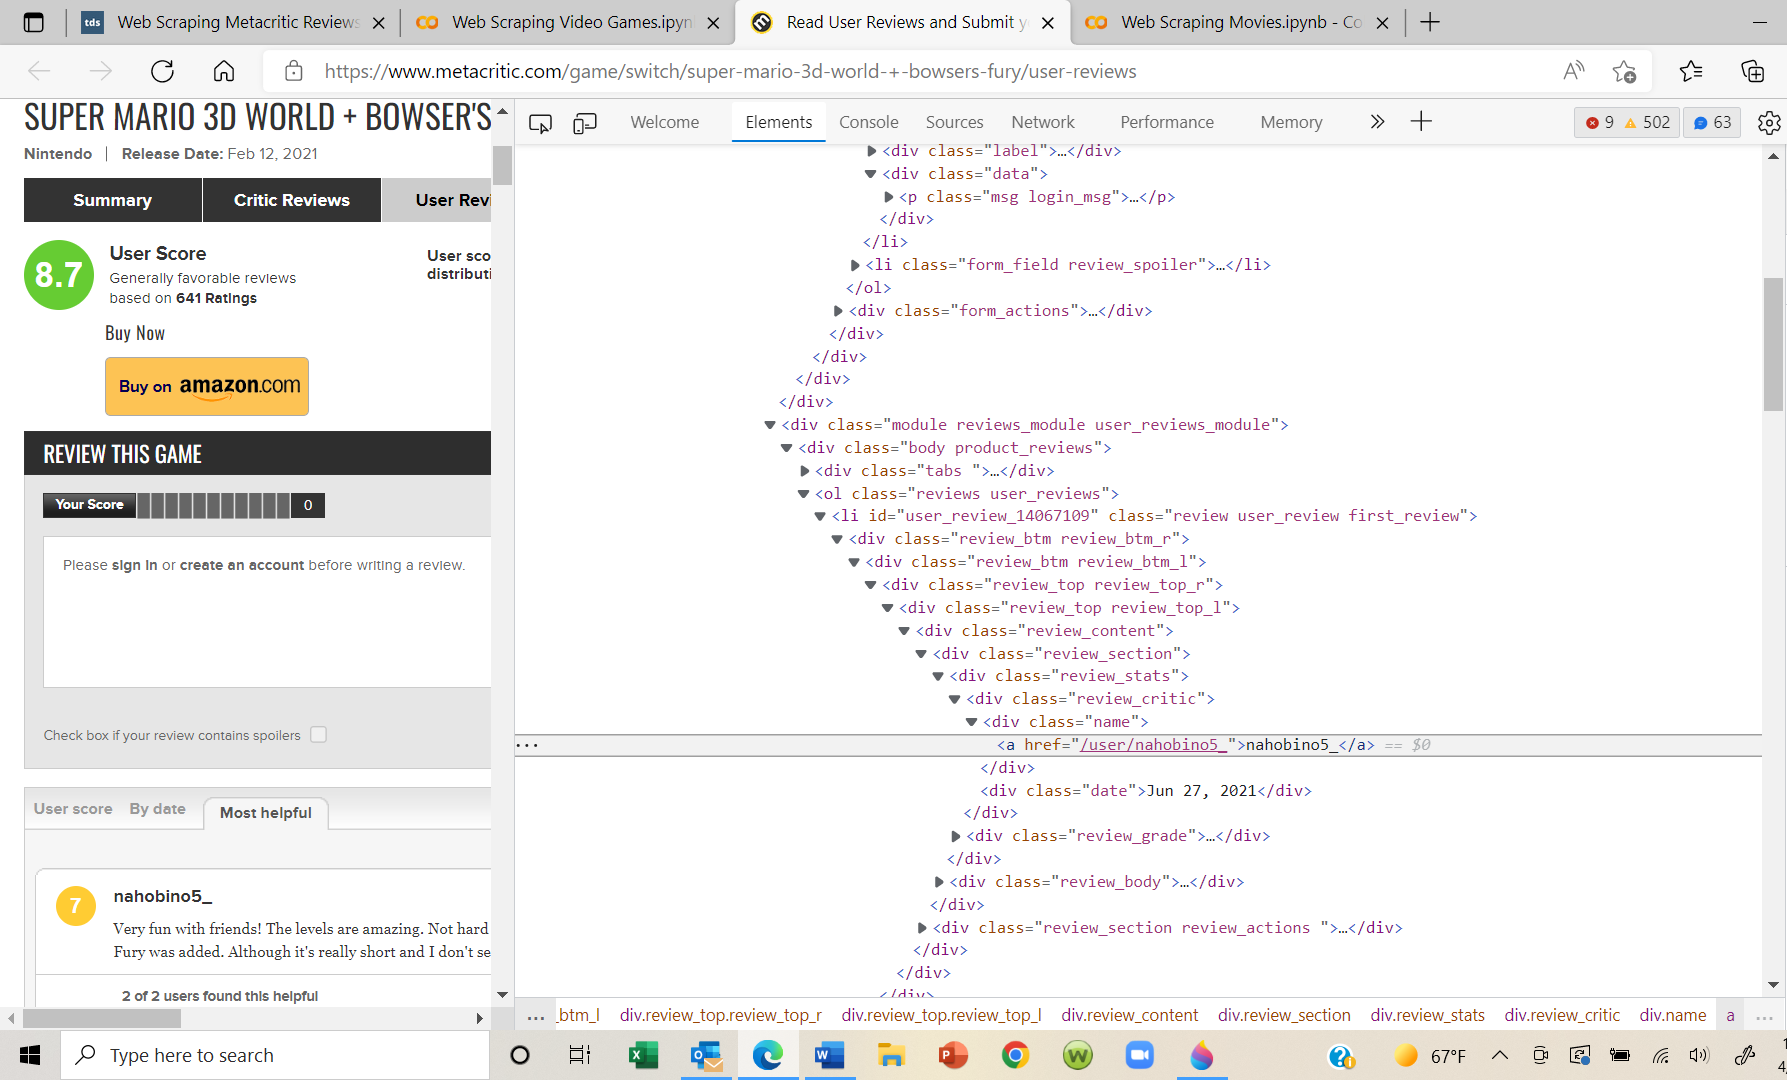

On the HTML screen, you will see highlighted the HTML line for the name 
<a h
<a href="/user/nahobino5_">nahobino5_</a>

The <a is referred to as the tag for the HTML line. In some cases, there is a tag, class and other attributes associated with an HTML line.

If you move up one line from this tag you will find the div tag with a class of "name". This is the parent of the <a tag.

So, if you wanted to find, extract and capture all the reviewer names on the web page you would do the following steps.
1. Find all the HTML lines for a specific parent (div tag with class = name) which would include their associated children.

2. Extract the data elements and build a list containing the reviewer names. 

The code for finding and extracting reviewer names would be the following:

names = []

for links in soup.find_all('div', class_='name'):

     name = links.get_text().strip()
     names.append(name) 

We will find, extract and store the other data elements on the web page following a similar procedure as described above.

**Retrieve and Convert the HTML**

Create an object (URL) containing the website address and send a get request for the specific URL's HTML to the web server. Then retrieve the HTML data that the web server sends back and convert the data into a BeautifulSoup object.

In [2]:
# Extract the HTML and create a BeautifulSoup object.
url = 'https://www.metacritic.com/game/switch/super-mario-3d-world-+-bowsers-fury/user-reviews'

user_agent = {'User-agent': 'Mozilla/5.0'}

def get_page_contents(url):
    page = requests.get(url, headers = user_agent)
    return BeautifulSoup(page.text, 'html.parser')

soup = get_page_contents(url)

The HTML content of the webpages will be parsed and scraped using Beautiful Soup. Beautiful Soup is a great tool for parsing and scraping websites because of the numerous functions it provides to extract data from HTML. To learn more about BeautifulSoup select this link (https://www.crummy.com/software/BeautifulSoup/bs4/doc/#specifying-the-parser-to-usehttps://) 

For this project we will be using the Metacritic Super Mario 3d World Reviews webpage. You can find this webpage by selecting this link https://www.metacritic.com/game/switch/super-mario-3d-world-+-bowsers-fury/user-reviews

After reviewing the Metacritic Super Mario 3d World Reviews webpage, I have decided to extract the following data elements from the reviews: 

*   Name 
*   Date
*   Rating
*   Review 

**Find and Extract the Data Elements**

For each of the data elements we want to extract, we will find all the HTML lines that are within a specific tag and class. We will then extract the data elements and store the data in a list. For review text, longer reviews (where the users click on ‘Expand’ and enters more text) are within the span tag with class of blurb blurb_expanded. Shorter reviews are within the span tag with class of blurb blurb_collapsed. 

In [3]:
names = []
for links in soup.find_all('div', class_='name'):
     name = links.get_text().strip()
     names.append(name) 

In [4]:
dates = []
for links in soup.find_all('div', class_='date'):
     date = links.get_text()
     dates.append(date) 

In [5]:
ratings = []   
for links in soup.find_all('div', class_='metascore_w user medium game positive indiv'):
     score = links.get_text()
     ratings.append(score)

In [6]:
reviews = []   
for links in soup.find_all('span', class_='blurb blurb_expanded'):
     review = links.get_text()
     reviews.append(review)

for links in soup.find_all('span', class_='blurb blurb_collapsed'):
     review = links.get_text()
     reviews.append(review)  


**Create the Dictionary** 

We will create a dictionary that will contain the data names and values for all the data elements that were extracted.  

In [7]:
# Create the dictionary.
games_dict = {'Name': names, 'Date': dates, 'Rating': ratings, 'Review': reviews}

Let's look at the length of the lists.

In [ ]:
# Print the lengths of each list.  
print(len(names), len(dates), len(ratings), len(reviews))
100 103 37 78



**Create and Display the Data Frame**

We need to adjust for missing values in columns. This step will create the DataFrame as each key was a row and like this the missing values are actually missing columns which is no problem for pandas (only missing rows lead to ValueError during creation). We need to transpose the DataFrame (flip the axis) and change the rows to columns. 

In [8]:
# Create the data frame.
game = pd.DataFrame.from_dict(games_dict, orient='index')
games = game.transpose()

Print the new data frame.

In [9]:
games.head(4)

,Name,Date,Rating,Review
0,nahobino5_,"Jun 27, 2021",9,Super Mario 3D World + Bowser's Fury is one of...
1,mwkelly13,"May 26, 2021",8,A luxurious and high-caliber platform game tha...
2,iz_02,"Jun 7, 2021",9,"I, like many others, didn't like 3d World when..."
3,AlfredJensen,"Aug 3, 2021",9,I didn't had a wii U so I had never experience...



**Convert Data Frame to a CVS File**

If needed, we can create a csv file from the data frame that was created in the previous step. 

In [41]:
games.to_csv('reviews.csv', index=False, header=True)
reviews = pd.read_csv('reviews.csv', lineterminator='\n')
print(reviews)

             Name          Date  Rating  \
0      nahobino5_  Jun 27, 2021     9.0   
1       mwkelly13  May 26, 2021     8.0   
2           iz_02  Jun  7, 2021     9.0   
3    AlfredJensen  Aug  3, 2021     9.0   
4             jte  Feb 14, 2021     9.0   
..            ...           ...     ...   
98        EdwardG  Mar  4, 2021     NaN   
99          B-Bog  Mar  3, 2021     NaN   
100           NaN  Oct 22, 2021     NaN   
101           NaN  Oct 12, 2021     NaN   
102           NaN  May 17, 2021     NaN   

                                                Review  
0    Super Mario 3D World + Bowser's Fury is one of...  
1    A luxurious and high-caliber platform game tha...  
2    I, like many others, didn't like 3d World when...  
3    I didn't had a wii U so I had never experience...  
4    This is a great bundle from Nintendo. Not only...  
..                                                 ...  
98                                                 NaN  
99                         